In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import glob

# BERT

In [2]:
with open('run-metrics.json', 'r') as f:
    data = json.load(f)
print(data)

{'variance_metrics': {'full_set_var_sum': 0.8371616005897522, 'full_set_var_values': [0.045681219547986984, 0.030603904277086258, 0.029345836490392685, 0.026773635298013687, 0.02451908029615879, 0.022191615775227547, 0.02012275904417038, 0.018668321892619133, 0.01699906215071678, 0.0161441620439291, 0.015137050300836563, 0.01488886121660471, 0.014030903577804565, 0.013279978185892105, 0.012955030426383018, 0.012708143331110477, 0.012045631185173988, 0.011758376844227314, 0.011413678526878357, 0.01112492848187685, 0.010817628353834152, 0.010292262770235538, 0.010020196437835693, 0.0099154869094491, 0.00980390701442957, 0.009520405903458595, 0.009171979501843452, 0.009023783728480339, 0.008810154162347317, 0.008649900555610657, 0.008559624664485455, 0.008421508595347404, 0.008255038410425186, 0.008040486834943295, 0.00796289462596178, 0.007754337042570114, 0.007561211474239826, 0.007403586059808731, 0.007246369495987892, 0.007178264670073986, 0.007105707190930843, 0.007073891814798117, 0

In [3]:
variance_metrics = data['variance_metrics']
modelling_metrics = data['modelling_metrics']
subset_sizes = modelling_metrics['subset_size']

In [4]:
def get_key(filename):
    return filename.split('/')[2].split('-')[2].split('.')[0].lower()

In [5]:
file_list = glob.glob('./Eval-Results-bert-base-uncased/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed


In [6]:
results = {}

In [7]:
results['subset_size'] = subset_sizes
results['r2_value'] = variance_metrics['r2_values']
results['test_accuracy'] = modelling_metrics['test_accuracies']
results['test_loss'] = modelling_metrics['test_losses']

In [8]:
subset_sizes = modelling_metrics['subset_size']

for key, values in odd_results.items():
    values = json.loads(values)
    metrics = values['evaluation_metrics']
    losses = []
    accuracies = []
    for metric in metrics:
        loss = metric['eval_loss']
        acc = metric['eval_accuracy']
        losses.append(loss)
        accuracies.append(acc)

    results[f"{key}_loss"] = losses
    results[f"{key}_accuracy"] = accuracies

In [9]:
results_df = pd.DataFrame(results)
results_df

,subset_size,r2_value,test_accuracy,test_loss,sst2_loss,sst2_accuracy,tweet_eval_loss,tweet_eval_accuracy,yelp_loss,yelp_accuracy
0,2500,0.827268,0.84924,0.354975,0.398396,0.816389,0.691981,0.589606,0.309053,0.878421
1,5000,0.832992,0.86464,0.315146,0.355875,0.850881,0.721297,0.605021,0.287472,0.883947
2,7500,0.834808,0.87212,0.309031,0.377850,0.838468,0.692778,0.608262,0.281490,0.885974
3,10000,0.835812,0.87452,0.291922,0.340700,0.858825,0.639589,0.648239,0.275166,0.885421
4,12500,0.836299,0.87344,0.298309,0.353231,0.844912,0.703618,0.633545,0.316007,0.860895
5,15000,0.836610,0.88776,0.291098,0.384584,0.838097,0.603409,0.711302,0.306264,0.865342
6,17500,0.836960,0.87796,0.284541,0.399323,0.802388,0.533752,0.758662,0.327960,0.846395
7,20000,0.837186,0.86952,0.295274,0.342940,0.852708,0.757434,0.554383,0.302919,0.877211
8,22500,0.837203,0.88560,0.271968,0.340548,0.849322,0.744779,0.553771,0.306925,0.871184
9,25000,0.837535,0.87224,0.297661,0.328276,0.859642,0.663371,0.627818,0.302332,0.879158


In [10]:
results_df['mean_odd_accuracy'] = results_df[['sst2_accuracy', 'tweet_eval_accuracy', 'yelp_accuracy']].mean(axis=1)
results_df['mean_odd_loss'] = results_df[['sst2_loss', 'tweet_eval_loss', 'yelp_loss']].mean(axis=1)
results_df

,subset_size,r2_value,test_accuracy,test_loss,sst2_loss,sst2_accuracy,tweet_eval_loss,tweet_eval_accuracy,yelp_loss,yelp_accuracy,mean_odd_accuracy,mean_odd_loss
0,2500,0.827268,0.84924,0.354975,0.398396,0.816389,0.691981,0.589606,0.309053,0.878421,0.761472,0.466477
1,5000,0.832992,0.86464,0.315146,0.355875,0.850881,0.721297,0.605021,0.287472,0.883947,0.779950,0.454881
2,7500,0.834808,0.87212,0.309031,0.377850,0.838468,0.692778,0.608262,0.281490,0.885974,0.777568,0.450706
3,10000,0.835812,0.87452,0.291922,0.340700,0.858825,0.639589,0.648239,0.275166,0.885421,0.797495,0.418485
4,12500,0.836299,0.87344,0.298309,0.353231,0.844912,0.703618,0.633545,0.316007,0.860895,0.779784,0.457619
5,15000,0.836610,0.88776,0.291098,0.384584,0.838097,0.603409,0.711302,0.306264,0.865342,0.804914,0.431419
6,17500,0.836960,0.87796,0.284541,0.399323,0.802388,0.533752,0.758662,0.327960,0.846395,0.802481,0.420345
7,20000,0.837186,0.86952,0.295274,0.342940,0.852708,0.757434,0.554383,0.302919,0.877211,0.761434,0.467764
8,22500,0.837203,0.88560,0.271968,0.340548,0.849322,0.744779,0.553771,0.306925,0.871184,0.758092,0.464084
9,25000,0.837535,0.87224,0.297661,0.328276,0.859642,0.663371,0.627818,0.302332,0.879158,0.788873,0.431326


<Axes: >

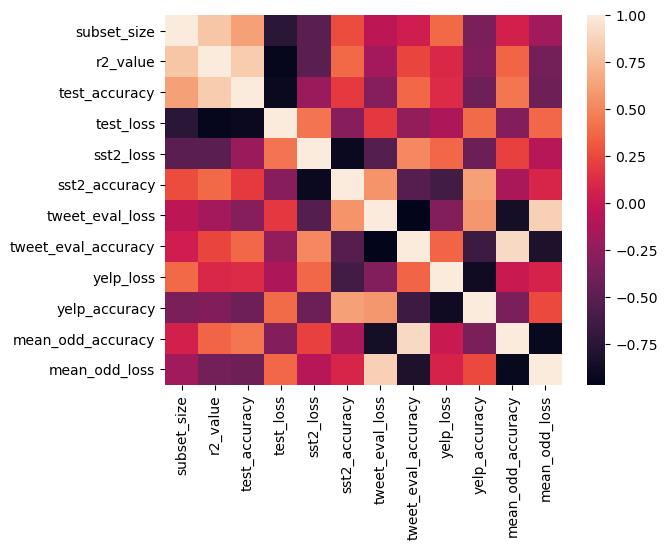

In [11]:
sns.heatmap(results_df.corr())

[(0.82, 0.85)]

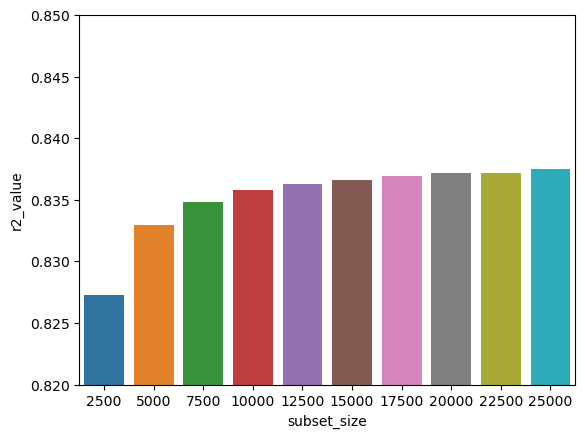

In [12]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['r2_value'])
plot.set(ylim=(0.82, 0.85))

[(0.7, 0.9)]

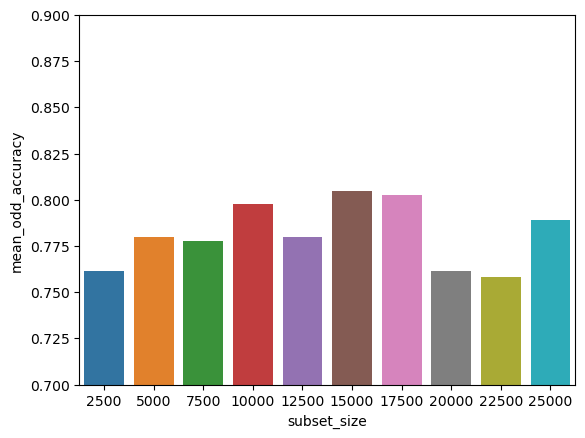

In [13]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'])
plot.set(ylim=(0.7, 0.9))

[(0.4, 0.6)]

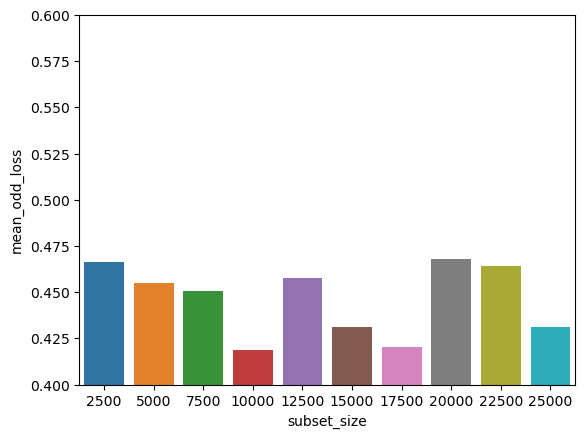

In [14]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'])
plot.set(ylim=(0.4, 0.6))

[(0.4, 0.9)]

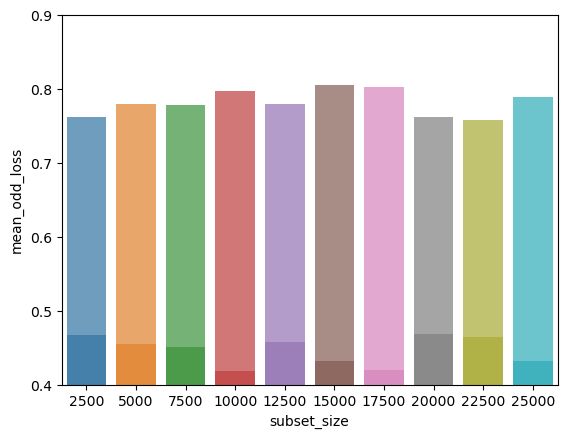

In [15]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7)
plot.set(ylim=(0.4, 0.9))


[(0.2, 0.9)]

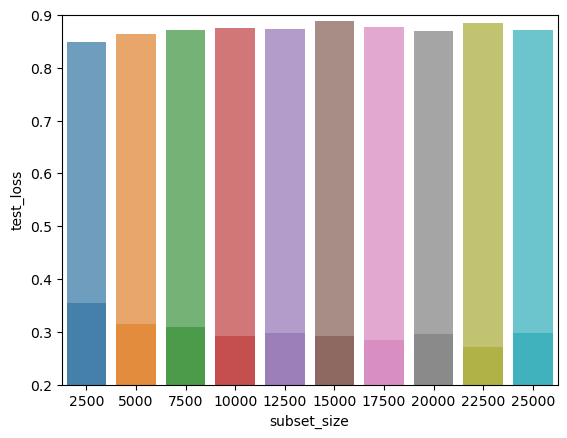

In [16]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7)
plot.set(ylim=(0.2, 0.9))

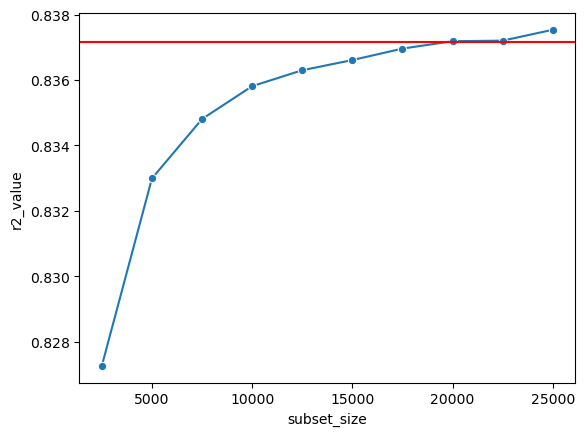

In [17]:
graph = sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], marker="o")
graph.axhline(variance_metrics['full_set_var_sum'], color='red')

<Axes: xlabel='subset_size', ylabel='sst2_accuracy'>

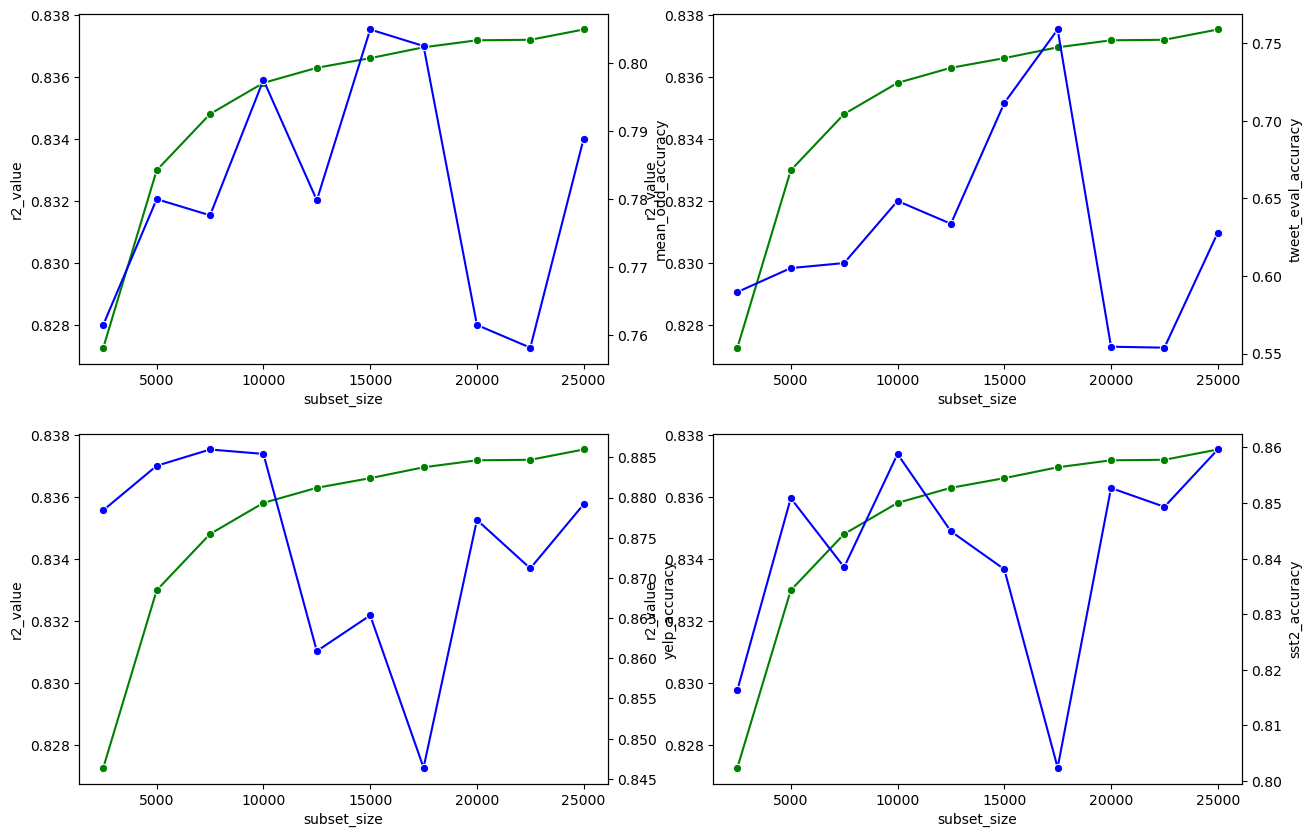

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[0][0], marker="o")
ax1 = axes[0][0].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], color="b", ax=ax1, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[0][1], marker="o")
ax2 = axes[0][1].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['tweet_eval_accuracy'], color="b", ax=ax2, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[1][0], marker="o")
ax3 = axes[1][0].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['yelp_accuracy'], color="b", ax=ax3, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[1][1], marker="o")
ax4 = axes[1][1].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['sst2_accuracy'], color="b", ax=ax4, marker="o")

<Axes: xlabel='subset_size', ylabel='test_accuracy'>

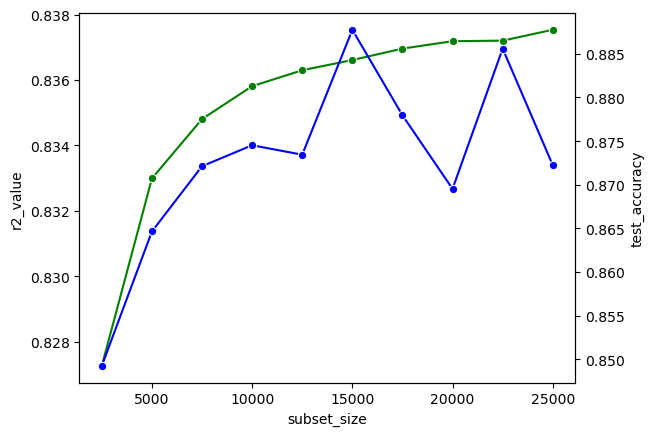

In [19]:
sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", marker="o")
ax2 = plt.twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['test_accuracy'], color="b", ax=ax2, marker="o")

(0.2, 0.9)

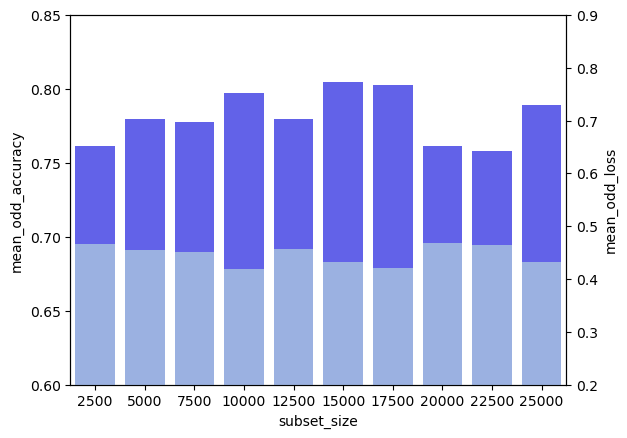

In [19]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7, color='blue')
plot.set_ylim(0.6, 0.85)
ax2 = plt.twinx()
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7, color='lightblue', ax=ax2)
ax2.set_ylim(0.2, 0.9)

(0.1, 0.6)

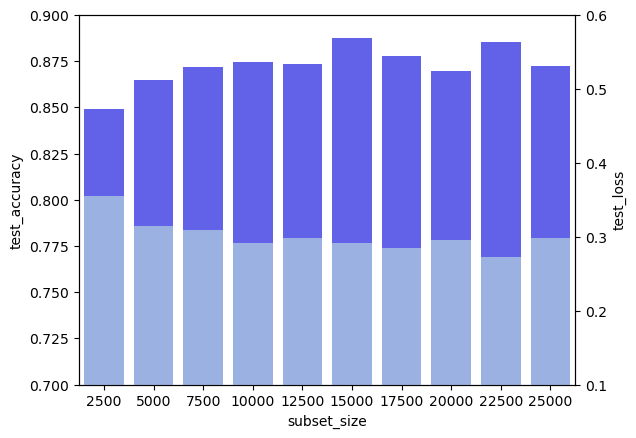

In [22]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7, color='blue')
plot.set_ylim(0.7, 0.9)
ax2 = plt.twinx()
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7, color='lightblue', ax=ax2)
ax2.set_ylim(0.1, 0.6)

In [23]:
results_df.to_csv('../analysis_results/imdb_bert.csv', index=False)